**Introduction**
Pneumonia is a lung illness caused by a virus or bacterium that can range in severity from mild to severe. Because of the inflammation, the patient is unable to breathe enough oxygen into the circulation. It occurs when an infection causes the lungs' air sacs (alveoli) to fill with fluid or pus, which can damage one or both lungs. If a doctor suspects pneumonia, a chest X-ray will be taken to determine the extent of the infection in the patient's lungs. Other symptoms may include:
Difficulty breathing
Fever
Chest pain
Cough
Chills
Fatigue
For some individuals, their pneumonia becomes so severe that they must be hospitalized and given oxygen or put on a ventilator to help support their respiratory functions.
Similarly, a coronavirus identified in 2019, SARS-CoV-2, has caused a pandemic of respiratory illness, called COVID-19. COVID-19 causes mild to moderate respiratory disease in the majority of people who are diagnosed with it. Seniors and those with underlying illnesses such chronic lung disease, diabetes, cardiovascular disease, and cancer, on the other hand, are at a higher risk of serious complications or death. COVID-19 can cause the following symptoms:
Fever or chills
Shortness of breath or difficulty breathing
Cough
Fatigue
Sore throat
Congestion or runny nose
Muscle or body aches
Headache
New loss of taste or smell
Nausea or vomiting
Diarrhea
These deseases are dangerous respiratory illnesses, especially for sensitive populations such as individuals with chronic obstructive pulmonary disorder (COPD) and asthma. Because of the similarities on these illness we are building models using neural networks to train X-Rays and identified if is Covid-19, Pneumonia or a healthy patient. Chest imaging represents a very important role in the early diagnosis and treatment of patients suspected for COVID-19.
We will use diferent models and check on the accuracy to determine the best one.
This work is of high interest to healthcare providers,
as it helps to better diagnose COVID-19 from chest X-rays in less time with higher accuracy.

**The Data Set**
It contains around 137 cleaned images of COVID-19 and 317 in total containing Viral Pneumonia and Normal Chest X-Rays structured into the test and train directories.
So, we have 3 different classes. Covid, Pneumonia and Normal.
This project leveraging the data from Kaggle repository.

In [ ]:
# Downloading required keras tuner library
!pip install -q -U keras-tuner

In [ ]:
# Importing all the required packages
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras as ks
print('keras: %s' % ks.__version__)
from keras.preprocessing.image import ImageDataGenerator #image generator label data based on the dir the image in contained in
from keras.preprocessing import image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import keras.utils
from keras import utils as np_utils
from keras.utils import np_utils
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau


from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model




import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix


import os
from skimage import io, transform

import seaborn as sns

%matplotlib inline
%matplotlib inline

keras: 2.7.0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import zipfile
# Getting the File
local_zip ='/content/gdrive/My Drive/covid.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/Covid19-dataset')
zip_ref.close()

In [ ]:
# Creating the path for test and train set
train_path=os.path.join('/tmp/Covid19-dataset/Covid19-dataset/train')
test_path= os.path.join('/tmp/Covid19-dataset/Covid19-dataset/test')

In [ ]:
train_normal_dir = os.path.join('/tmp/Covid19-dataset/Covid19-dataset/train/Normal')
train_pneumonia_dir = os.path.join('/tmp/Covid19-dataset/Covid19-dataset/train/Viral Pneumonia')
train_covid_dir = os.path.join('/tmp/Covid19-dataset/Covid19-dataset/train/Covid')

test_normal_dir = os.path.join('/tmp/Covid19-dataset/Covid19-dataset/test/Normal')
test_pneumonia_dir = os.path.join('/tmp/Covid19-dataset/Covid19-dataset/test/Viral Pneumonia')
test_covid_dir = os.path.join('/tmp/Covid19-dataset/Covid19-dataset/test/Covid')



In [ ]:
# Reading all file names from train and test directory for all three classes - Pnuemonia, Covid and Normal
train_normal_names = os.listdir(train_normal_dir)
train_pneumonia_names = os.listdir(train_pneumonia_dir)
train_covid_names = os.listdir(train_covid_dir)
test_normal_names = os.listdir(test_normal_dir)
test_pneumonia_names = os.listdir(test_pneumonia_dir)
test_covid_names = os.listdir(test_covid_dir)

In [ ]:
print('total train normal chest xray: ', len(os.listdir(train_normal_dir)))
print('total train pneumonia chest xray:', len(os.listdir(train_pneumonia_dir)))
print('total train Covid chest xray:', len(os.listdir(train_covid_dir)))
print('total test normal chest xray: ', len(os.listdir(test_normal_dir)))
print('total test pneumonia chest xray: ', len(os.listdir(test_pneumonia_dir)))
print('total test covid chest xray:', len(os.listdir(test_covid_dir)))

total train normal chest xray:  70
total train pneumonia chest xray: 70
total train Covid chest xray: 111
total test normal chest xray:  20
total test pneumonia chest xray:  20
total test covid chest xray: 26


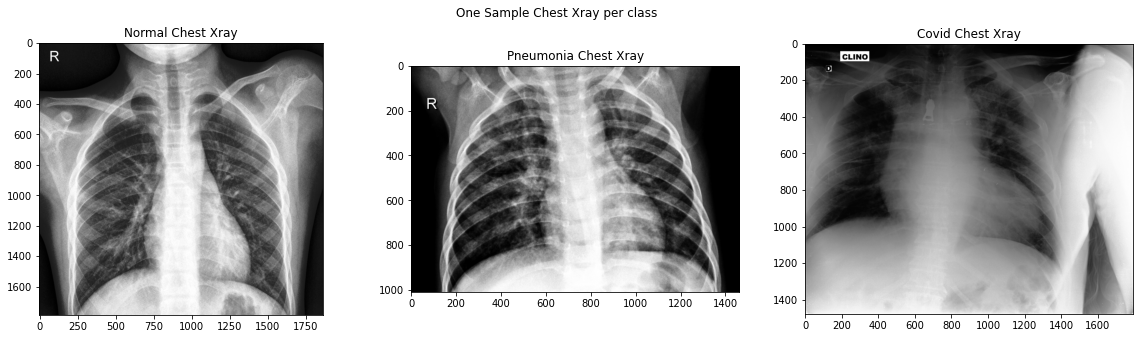

In [ ]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('One Sample Chest Xray per class')
# ax1.plot(x, y)
img1 = mpimg.imread(os.path.join(train_normal_dir, train_normal_names[1]))
ax1.title.set_text('Normal Chest Xray')
ax1.imshow(img1, cmap = 'gray')

img2 = mpimg.imread(os.path.join(train_pneumonia_dir, train_pneumonia_names[1]))
ax2.title.set_text('Pneumonia Chest Xray')
ax2.imshow(img2, cmap = 'gray')

img3 = mpimg.imread(os.path.join(train_covid_dir, train_covid_names[1]))
ax3.title.set_text('Covid Chest Xray')
ax3.imshow(img3, cmap = 'gray')

**Preprocessing**
Preprocess image dataset by changing the image size, normalizing and got encoding labels. Use of data augmentation

**Data Augmentation**
In this section, we present some basic but powerful augmentation techniques that are popularly used.
Rescale, Rotation, Flip, among others.
Image Augmentation increases the size of the dataset by producing a modified version of the current training set pictures, which increases dataset variation and, as a result, improves the model's ability to predict new images.
We are using Categorical class mode because we have 3 classes.

In [ ]:
##image augmentaion
train = ImageDataGenerator(rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
train_dataset = train.flow_from_directory(train_path,
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'categorical',shuffle=True)

Found 251 images belonging to 3 classes.


In [ ]:
train_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

**Models and Architecture**
CNN Architecture
Things to note:
Construct the model with a layer of Conv2D followed by a layer of MaxPooling.
The kernel_size is preferred to be odd number.
relu is the most preferred activation function.
input_shape takes in image width & height with last dimension as color channel.
Flattening the input after CNN layers.
Use activation function as softmax for the last layer If the problem is more than 2 classes, define units as the total number of classes and use sigmoid for binary classification and set unit to 1.
Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses. We will use different types.
For Model Compile
Learning Rate — while training the aim for stochastic gradient descent is to minimize loss among actual and predicted values of training set. Path to minimize loss takes several steps. Adam is an adaptive learning rate method, which means, it computes individual learning rates for different parameters.
loss function — We will use categorical crossentropy because we have 3 classes.
metrics — accuracy — Calculate how often actual labels are equal to predictions. It will measure the loss and accuracy of training and validation.

In [ ]:
# Build First Model - Model0
model0 = Sequential()
# Input here is 4D array (batchsize, height, width, channels) - we have already created the train_generator with batch size 32
# 32 Images of size each 150x150 with 3 color channels will be input into this layer
model0.add(Conv2D(64, kernel_size=7, activation='relu', input_shape=(150,150,3)))
model0.add(MaxPooling2D(pool_size=(4,4), strides=(2,2)))
model0.add(Conv2D(32, kernel_size=5, activation='relu'))
model0.add(MaxPooling2D(pool_size=(4,4), strides=(2,2)))
model0.add(Flatten())
model0.add(Dense(64,activation='relu'))
model0.add(Dense(3,activation='softmax'))
model0.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model0.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 144, 144, 64)      9472      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 71, 71, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 67, 67, 32)        51232     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_8 (Dense)             (None, 64)               

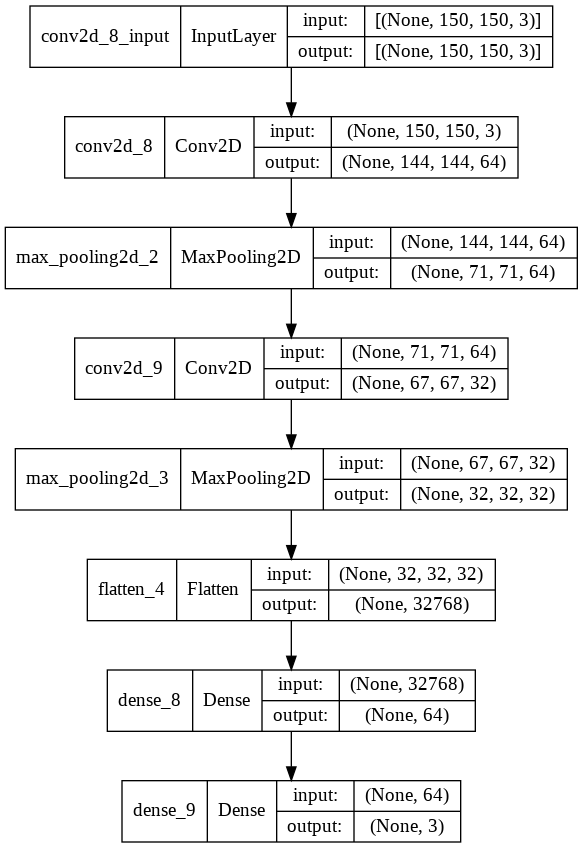

In [ ]:
# Chart for visualizing the Model
plot_model(model0,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
# Model Fitting on train set
model_train = model0.fit(train_dataset,
          batch_size=32,
          epochs=5,
          verbose=1,
          )

Epoch 1/5
8/8 [==============================] - 48s 5s/step - loss: 1.1353 - accuracy: 0.4104
Epoch 2/5
8/8 [==============================] - 31s 4s/step - loss: 1.0515 - accuracy: 0.4821
Epoch 3/5
8/8 [==============================] - 32s 4s/step - loss: 1.0033 - accuracy: 0.5259
Epoch 4/5
8/8 [==============================] - 33s 4s/step - loss: 1.0084 - accuracy: 0.5139
Epoch 5/5
8/8 [==============================] - 31s 4s/step - loss: 0.9560 - accuracy: 0.6016


Text(0, 0.5, 'Loss0')

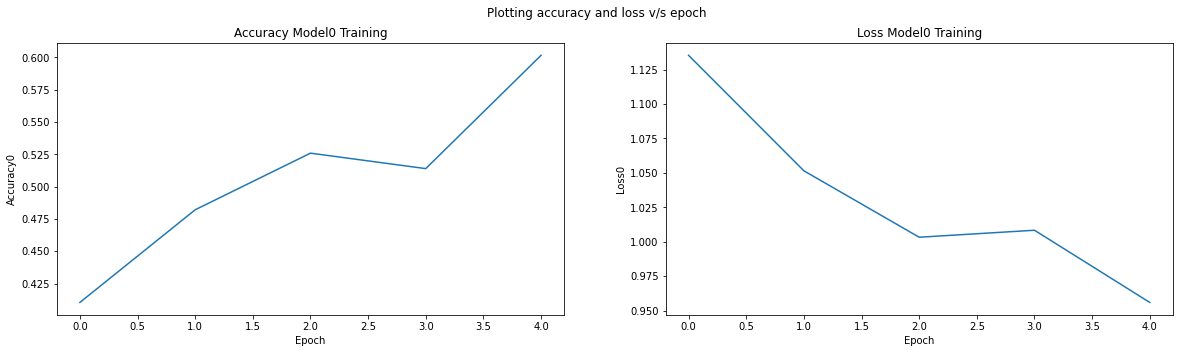

In [ ]:
# Plotting accuracy and loss v/s epoch
accuracy0 = model_train.history['accuracy']
loss0 = model_train.history['loss']

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Plotting accuracy and loss v/s epoch')

ax1.title.set_text('Accuracy Model0 Training')
sns.lineplot(data=accuracy0, ax=ax1)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy0')


ax2.title.set_text('Loss Model0 Training')
sns.lineplot(data=loss0, ax=ax2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss0')

In [ ]:
#Predict
import warnings
warnings.filterwarnings('ignore')
test = ImageDataGenerator(rescale = 1/255)                                       
test_dataset = test.flow_from_directory(test_path, target_size=(150, 150),batch_size=32,shuffle=False)
predictions = model0.predict(test_dataset)
predicted_classes0 = np.argmax(predictions, axis=1)
true_classes = test_dataset.classes
class_labels = list(test_dataset.class_indices.keys()) 
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes0, target_names=class_labels)
print(report)

Found 66 images belonging to 3 classes.
                 precision    recall  f1-score   support

          Covid       0.83      0.92      0.87        26
         Normal       0.75      0.75      0.75        20
Viral Pneumonia       0.71      0.60      0.65        20

       accuracy                           0.77        66
      macro avg       0.76      0.76      0.76        66
   weighted avg       0.77      0.77      0.77        66



Classification Report
Precision = TruePositives / (TruePositives + FalsePositives)
Recall = TruePositives / (TruePositives + FalseNegatives)
F1 = (2 * Precision * Recall) / (Precision + Recall)

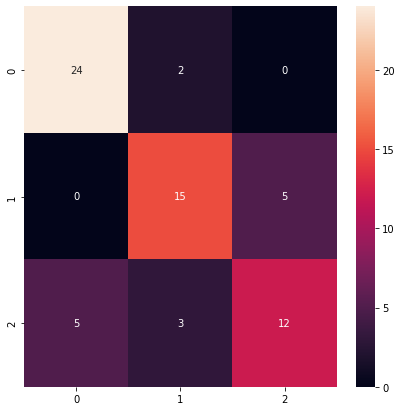

In [ ]:
#Confusion Matrix
#The easy way to interpret the confusion matrix for binary or multiclass classification is to see if we get maximum values in diagonal cells from left to right and minimum value in the rest of the cells.
conf_matrix3 = confusion_matrix(true_classes, predicted_classes0)
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix3, annot=True)

In [ ]:
#Model2
model2 = Sequential()
# Input here is 4D array (batchsize, height, width, channels) - we have already created the train_generator with batch size 32
# 32 Images of size each 150x150 with 3 color channels will be input into this layer
model2.add(Conv2D(64, kernel_size=7, activation='relu', input_shape=(150,150,3)))
model2.add(MaxPooling2D(pool_size=(3,3), strides=(1,1)))
model2.add(Conv2D(32, kernel_size=7, activation='relu', input_shape=(150,150,3)))
model2.add(MaxPooling2D(pool_size=(3,3), strides=(1,1)))
model2.add(Conv2D(16, kernel_size=5, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Flatten())
model2.add(Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(3,activation='sigmoid'))
model2.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 144, 144, 64)      9472      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 142, 142, 64)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 136, 136, 32)      100384    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 134, 134, 32)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 130, 130, 16)      12816     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 129, 129, 16)    

In [ ]:
#Create learning rate schedule
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

optimizer_sgd = keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.0, nesterov=True)

# compile the keras model
model2.compile(loss='categorical_crossentropy', optimizer=optimizer_sgd, metrics=['accuracy'])
model2.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 144, 144, 64)      9472      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 142, 142, 64)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 136, 136, 32)      100384    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 134, 134, 32)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 130, 130, 16)      12816     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 129, 129, 16)    

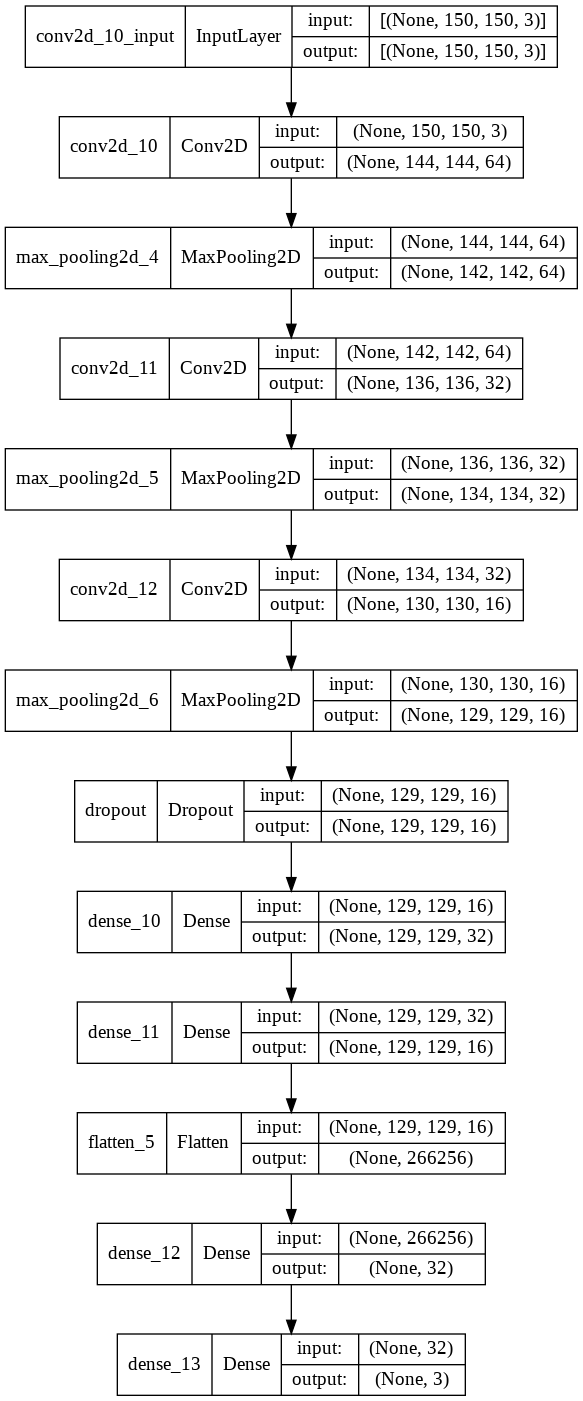

In [ ]:
plot_model(model2,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
model_train2 = model2.fit(train_dataset,
          batch_size=64,
          epochs=5,
          verbose=1,
          )

Epoch 1/5
8/8 [==============================] - 143s 18s/step - loss: 1.6843 - accuracy: 0.4661
Epoch 2/5
8/8 [==============================] - 136s 17s/step - loss: 2.1658 - accuracy: 0.4940
Epoch 3/5
8/8 [==============================] - 134s 16s/step - loss: 1.7036 - accuracy: 0.4422
Epoch 4/5
8/8 [==============================] - 134s 17s/step - loss: 1.6921 - accuracy: 0.5179
Epoch 5/5
8/8 [==============================] - 139s 17s/step - loss: 1.6266 - accuracy: 0.5936


Text(0, 0.5, 'Loss2')

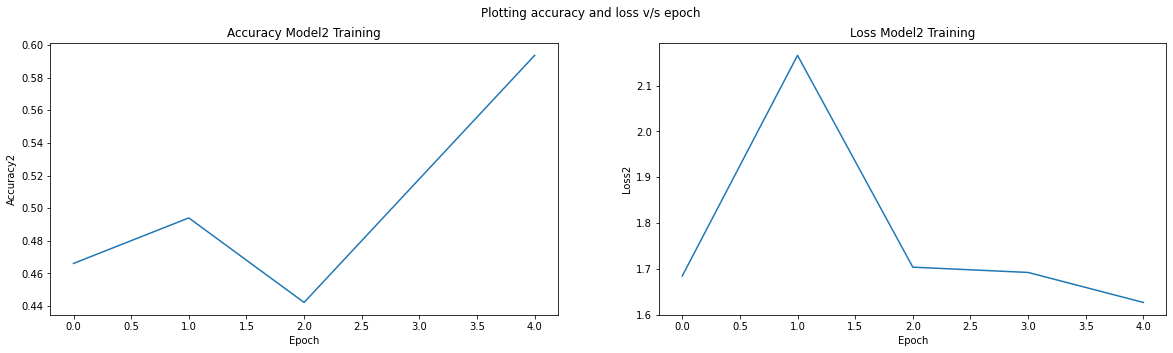

In [ ]:
# Plotting accuracy and loss v/s epoch
accuracy2 = model_train2.history['accuracy']
loss2 = model_train2.history['loss']

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Plotting accuracy and loss v/s epoch')

ax1.title.set_text('Accuracy Model2 Training')
sns.lineplot(data=accuracy2, ax=ax1)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy2')


ax2.title.set_text('Loss Model2 Training')
sns.lineplot(data=loss2, ax=ax2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss2')

In [ ]:
# Predict
import warnings
warnings.filterwarnings('ignore')
test = ImageDataGenerator(rescale = 1/255)                                       
test_dataset = test.flow_from_directory(test_path, target_size=(150, 150),batch_size=32,shuffle=False)
predictions = model2.predict(test_dataset)
predicted_classes2 = np.argmax(predictions, axis=1)
true_classes = test_dataset.classes
class_labels = list(test_dataset.class_indices.keys()) 
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes2, target_names=class_labels)
print(report)

Found 66 images belonging to 3 classes.
                 precision    recall  f1-score   support

          Covid       0.60      0.96      0.74        26
         Normal       0.86      0.30      0.44        20
Viral Pneumonia       0.65      0.55      0.59        20

       accuracy                           0.64        66
      macro avg       0.70      0.60      0.59        66
   weighted avg       0.69      0.64      0.60        66



Classification Report
Precision = TruePositives / (TruePositives + FalsePositives)
Recall = TruePositives / (TruePositives + FalseNegatives)
F1 = (2 * Precision * Recall) / (Precision + Recall)

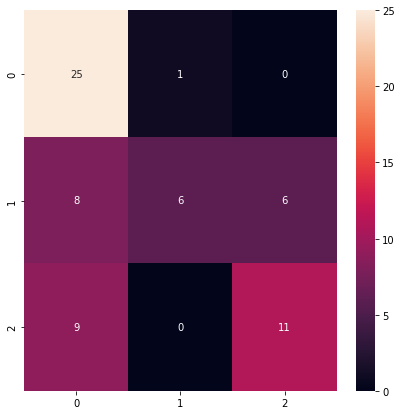

In [ ]:
#Confusion Matrix
#The easy way to interpret the confusion matrix for binary or multiclass classification is to see if we get maximum values in diagonal cells from left to right and minimum value in the rest of the cells.
conf_matrix3 = confusion_matrix(true_classes, predicted_classes2)
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix3, annot=True)

In [ ]:
##MODEL3
model3 = Sequential()
model3.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model3.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model3.add(keras.layers.Conv2D(64, (2, 2), activation='relu'))
model3.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Dropout(0.5))
model3.add(keras.layers.Dense(128, activation='relu'))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(64, activation='relu'))
model3.add(keras.layers.Dense(64, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))
model3.add(keras.layers.Dense(3, activation='softmax'))
model3.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 146, 146, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 145, 145, 64)      8256      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 72, 72, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 72, 72, 64)        0         
                                                                 
 dense_14 (Dense)            (None, 72, 72, 128)      

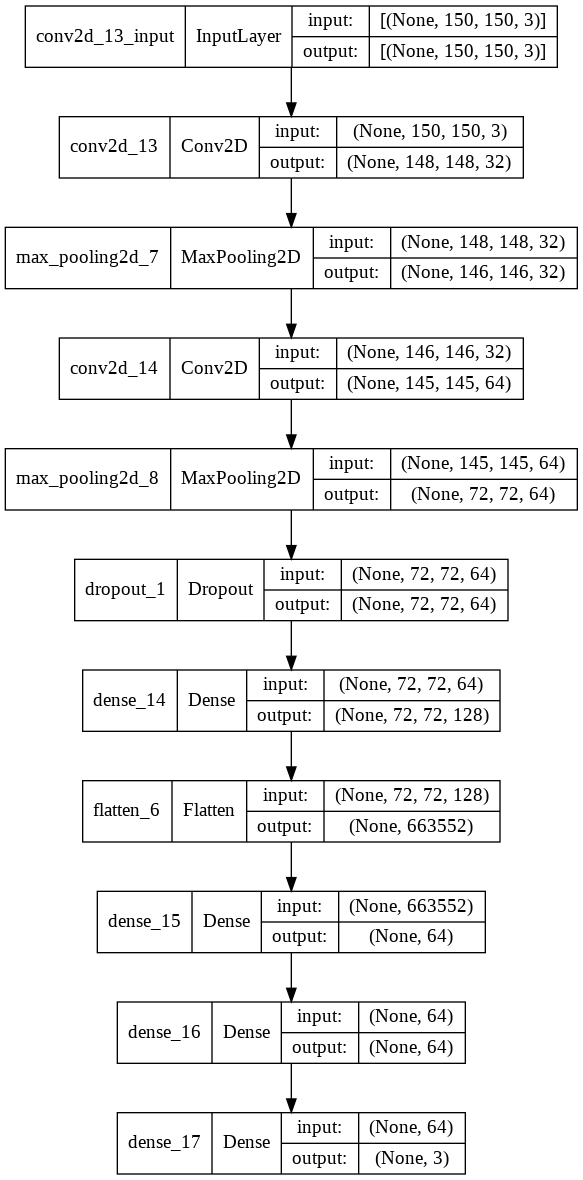

In [ ]:
plot_model(model3,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

modelcheck = ModelCheckpoint('Model3Check.hdf5', monitor='accuracy',verbose=1,save_best_only=True,mode='max')

In [ ]:
#Fit the Model
history3 = model3.fit(train_dataset, 
                    epochs=10,
                    callbacks=[modelcheck,reduce_lr,early_stopping],
                    batch_size=32)

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 12.6737 - accuracy: 0.4183
Epoch 00001: accuracy improved from -inf to 0.41833, saving model to Model3Check.hdf5


8/8 [==============================] - 34s 4s/step - loss: 12.6737 - accuracy: 0.4183 - lr: 0.0010
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 2.6991 - accuracy: 0.5339
Epoch 00002: accuracy improved from 0.41833 to 0.53386, saving model to Model3Check.hdf5


8/8 [==============================] - 32s 4s/step - loss: 2.6991 - accuracy: 0.5339 - lr: 0.0010
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 1.3426 - accuracy: 0.6375
Epoch 00003: accuracy improved from 0.53386 to 0.63745, saving model to Model3Check.hdf5


8/8 [==============================] - 32s 4s/step - loss: 1.3426 - accuracy: 0.6375 - lr: 0.0010
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 1.0499 - accuracy: 0.7769
Epoch 00004: accuracy improved from 0.63745 to 0.77689, saving model to Model3Check.hdf5


8/8 [==============================] - 33s 4s/step - loss: 1.0499 - accuracy: 0.7769 - lr: 0.0010
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 1.0035 - accuracy: 0.7769
Epoch 00005: accuracy did not improve from 0.77689


8/8 [==============================] - 31s 4s/step - loss: 1.0035 - accuracy: 0.7769 - lr: 0.0010
Epoch 6/10
8/8 [==============================] - ETA: 0s - loss: 0.8532 - accuracy: 0.8645
Epoch 00006: accuracy improved from 0.77689 to 0.86454, saving model to Model3Check.hdf5


8/8 [==============================] - 32s 4s/step - loss: 0.8532 - accuracy: 0.8645 - lr: 0.0010
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 0.7891 - accuracy: 0.8645
Epoch 00007: accuracy did not improve from 0.86454


8/8 [==============================] - 31s 4s/step - loss: 0.7891 - accuracy: 0.8645 - lr: 0.0010
Epoch 8/10
8/8 [==============================] - ETA: 0s - loss: 0.7159 - accuracy: 0.8765
Epoch 00008: accuracy improved from 0.86454 to 0.87649, saving model to Model3Check.hdf5


8/8 [==============================] - 32s 4s/step - loss: 0.7159 - accuracy: 0.8765 - lr: 0.0010
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 0.6832 - accuracy: 0.8845
Epoch 00009: accuracy improved from 0.87649 to 0.88446, saving model to Model3Check.hdf5


8/8 [==============================] - 32s 4s/step - loss: 0.6832 - accuracy: 0.8845 - lr: 0.0010
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 0.6312 - accuracy: 0.9163
Epoch 00010: accuracy improved from 0.88446 to 0.91633, saving model to Model3Check.hdf5


8/8 [==============================] - 32s 4s/step - loss: 0.6312 - accuracy: 0.9163 - lr: 0.0010


Text(0, 0.5, 'Loss3')

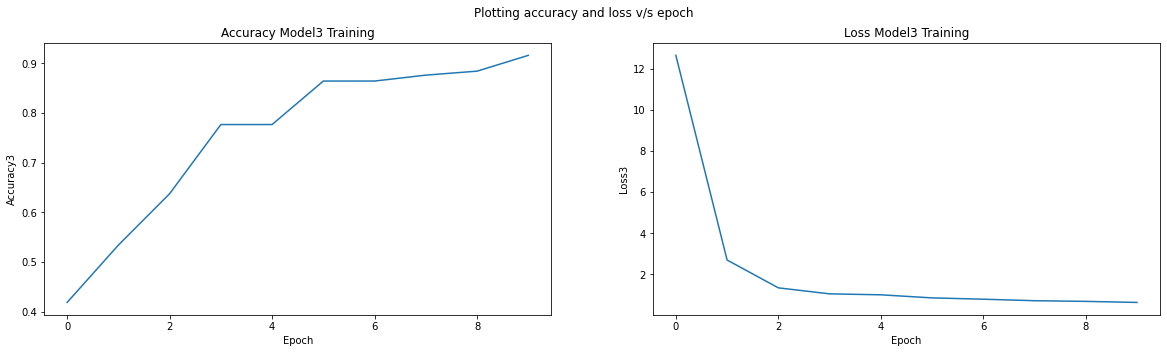

In [ ]:
# Plotting accuracy and loss v/s epoch
accuracy3 = history3.history['accuracy']
loss3 = history3.history['loss']

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Plotting accuracy and loss v/s epoch')

ax1.title.set_text('Accuracy Model3 Training')
sns.lineplot(data=accuracy3, ax=ax1)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy3')


ax2.title.set_text('Loss Model3 Training')
sns.lineplot(data=loss3, ax=ax2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss3')

In [ ]:
#Predict
test = ImageDataGenerator(rescale = 1/255)                                       
test_dataset = test.flow_from_directory(test_path, target_size=(150, 150),batch_size=32,shuffle=False)
predictions = model3.predict(test_dataset)
predicted_classes3 = np.argmax(predictions, axis=1)
true_classes3 = test_dataset.classes
class_labels3 = list(test_dataset.class_indices.keys()) 
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes3, predicted_classes3, target_names=class_labels3)
print(report)

Found 66 images belonging to 3 classes.
                 precision    recall  f1-score   support

          Covid       0.95      0.81      0.88        26
         Normal       0.70      0.70      0.70        20
Viral Pneumonia       0.71      0.85      0.77        20

       accuracy                           0.79        66
      macro avg       0.79      0.79      0.78        66
   weighted avg       0.80      0.79      0.79        66



Classification Report
Precision = TruePositives / (TruePositives + FalsePositives)
Recall = TruePositives / (TruePositives + FalseNegatives)
F1 = (2 * Precision * Recall) / (Precision + Recall)

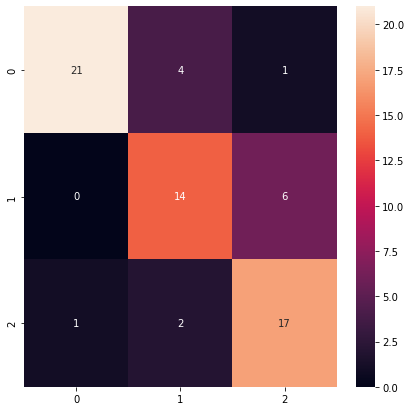

In [ ]:
#Confusion Matrix
#The easy way to interpret the confusion matrix for binary or multiclass classification is to see if we get maximum values in diagonal cells from left to right and minimum value in the rest of the cells.
conf_matrix3 = confusion_matrix(true_classes3, predicted_classes3)
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix3, annot=True)

In [ ]:
##Model1
model1 = Sequential()
# Input here is 4D array (batchsize, height, width, channels) - we have already created the train_generator with batch size 32
# 32 Images of size each 150x150 with 3 color channels will be input into this layer
model1.add(Conv2D(128, kernel_size=7, activation='relu', input_shape=(150,150,3)))
model1.add(MaxPooling2D(pool_size=(4,4), strides=(2,2)))
model1.add(Conv2D(64, kernel_size=5, activation='relu'))
model1.add(MaxPooling2D(pool_size=(4,4), strides=(2,2)))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dense(3,activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 144, 144, 128)     18944     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 71, 71, 128)      0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 67, 67, 64)        204864    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 65536)             0         
                                                                 
 dense_18 (Dense)            (None, 128)              

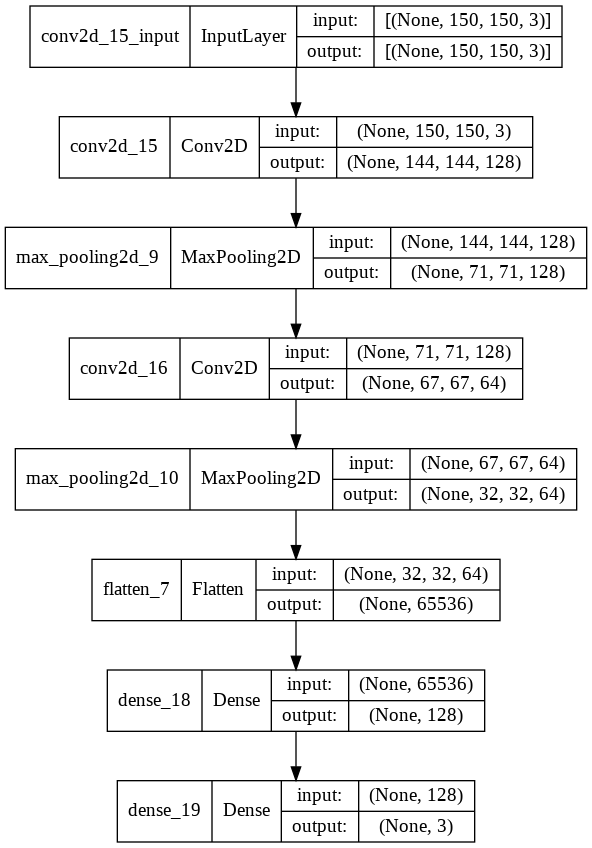

In [ ]:
#Visualize
plot_model(model1,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
modelcheck = ModelCheckpoint('Model1Check.hdf5', monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [ ]:
#Fit the Model
history = model1.fit(train_dataset, 
                    epochs=10,
                    callbacks=[modelcheck,reduce_lr,early_stopping],
                    batch_size=32)

Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 3.0828 - accuracy: 0.3665WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 60s 7s/step - loss: 3.0828 - accuracy: 0.3665 - lr: 0.0010
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 1.0815 - accuracy: 0.4183WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 62s 8s/step - loss: 1.0815 - accuracy: 0.4183 - lr: 0.0010
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 1.0240 - accuracy: 0.5139WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 57s 7s/step - loss: 1.0240 - accuracy: 0.5139 - lr: 0.0010
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 0.7612 - accuracy: 0.7092WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 57s 7s/step - loss: 0.7612 - accuracy: 0.7092 - lr: 0.0010
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 0.4828 - accuracy: 0.8327WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 57s 7s/step - loss: 0.4828 - accuracy: 0.8327 - lr: 0.0010
Epoch 6/10
8/8 [==============================] - ETA: 0s - loss: 0.4306 - accuracy: 0.8327WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 57s 7s/step - loss: 0.4306 - accuracy: 0.8327 - lr: 0.0010
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 0.3757 - accuracy: 0.8367WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 57s 7s/step - loss: 0.3757 - accuracy: 0.8367 - lr: 0.0010
Epoch 8/10
8/8 [==============================] - ETA: 0s - loss: 0.3903 - accuracy: 0.8566WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 57s 7s/step - loss: 0.3903 - accuracy: 0.8566 - lr: 0.0010
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 0.2672 - accuracy: 0.9084WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 57s 7s/step - loss: 0.2672 - accuracy: 0.9084 - lr: 0.0010
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 0.2638 - accuracy: 0.8805WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 57s 7s/step - loss: 0.2638 - accuracy: 0.8805 - lr: 0.0010


Text(0, 0.5, 'Loss1')

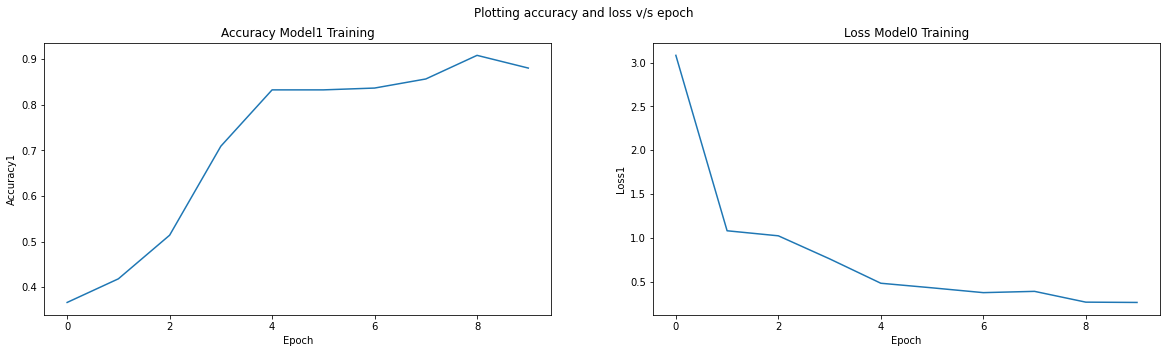

In [ ]:
# Plotting accuracy and loss v/s epoch
accuracy1 = history.history['accuracy']
loss1 = history.history['loss']

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Plotting accuracy and loss v/s epoch')

ax1.title.set_text('Accuracy Model1 Training')
sns.lineplot(data=accuracy1, ax=ax1)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy1')


ax2.title.set_text('Loss Model0 Training')
sns.lineplot(data=loss1, ax=ax2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss1')


In [ ]:
#Predict
import warnings
warnings.filterwarnings('ignore')
test = ImageDataGenerator(rescale = 1/255)                                       
test_dataset = test.flow_from_directory(test_path, target_size=(150, 150),batch_size=32,shuffle=False)
predictions = model0.predict(test_dataset)
predicted_classes1 = np.argmax(predictions, axis=1)
true_classes = test_dataset.classes
class_labels = list(test_dataset.class_indices.keys()) 
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes1, target_names=class_labels)
print(report)

Found 66 images belonging to 3 classes.
                 precision    recall  f1-score   support

          Covid       0.83      0.92      0.87        26
         Normal       0.75      0.75      0.75        20
Viral Pneumonia       0.71      0.60      0.65        20

       accuracy                           0.77        66
      macro avg       0.76      0.76      0.76        66
   weighted avg       0.77      0.77      0.77        66



Classification Report
Precision = TruePositives / (TruePositives + FalsePositives)
Recall = TruePositives / (TruePositives + FalseNegatives)
F1 = (2 * Precision * Recall) / (Precision + Recall)

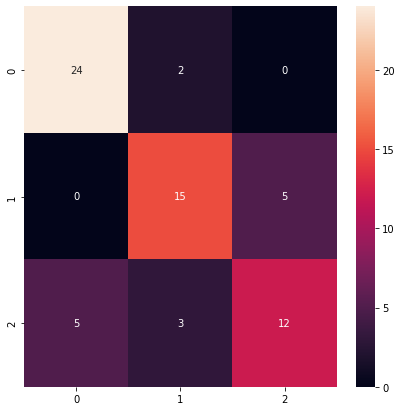

In [ ]:
#The easy way to interpret the confusion matrix for binary or multiclass classification is to see if we get maximum values in diagonal cells from left to right and minimum value in the rest of the cells.
conf_matrix = confusion_matrix(true_classes, predicted_classes1)
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix, annot=True)

**Keras Tuning**
Keras Tuner is a distributable, easy-to-use hyperparameter optimization framework that eliminates the annoyances of executing a hyperparameter search. Keras Tuner enables defining a search space and utilizing integrated methods to discover the ideal hyperparameter values simple.

In [ ]:
import keras_tuner as kt
def build_model(hp):
    # create model object
    model = keras.Sequential([
    #adding first convolutional layer    
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        #activation function
        activation='relu',
        input_shape=(150,150,3)),
    # adding second convolutional layer 
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    # adding flatten layer    
    keras.layers.Flatten(),
    # adding dense layer    
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    # output layer    
    keras.layers.Dense(3, activation='softmax')
    ])
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
tuner = kt.RandomSearch(build_model,
                    objective='accuracy',
                    max_trials = 5)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
tuner.search(train_dataset, epochs=20, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model_tuned = tuner.hypermodel.build(best_hps)
history = model_tuned.fit(train_dataset, epochs=20)

val_acc_per_epoch = history.history['accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/20
8/8 [==============================] - 31s 4s/step - loss: 19.7717 - accuracy: 0.4343
Epoch 2/20
8/8 [==============================] - 28s 3s/step - loss: 1.2841 - accuracy: 0.4343
Epoch 3/20
8/8 [==============================] - 28s 3s/step - loss: 0.8068 - accuracy: 0.6375
Epoch 4/20
8/8 [==============================] - 28s 3s/step - loss: 0.5231 - accuracy: 0.7928
Epoch 5/20
8/8 [==============================] - 33s 4s/step - loss: 0.3678 - accuracy: 0.8526
Epoch 6/20
8/8 [==============================] - 30s 3s/step - loss: 0.3290 - accuracy: 0.8884
Epoch 7/20
8/8 [==============================] - 28s 3s/step - loss: 0.3610 - accuracy: 0.8526
Epoch 8/20
8/8 [==============================] - 29s 3s/step - loss: 0.3032 - accuracy: 0.8725
Epoch 9/20
8/8 [==============================] - 28s 3s/step - loss: 0.2508 - accuracy: 0.9124
Epoch 10/20
8/8 [==============================] - 28s 3s/step - loss: 0.2222 - accuracy: 0.9163
Epoch 11/20
8/8 [=====================

In [ ]:
# Creating the final model with the best epochs and best hyperparameters
model_tuned = tuner.hypermodel.build(best_hps)
history = model_tuned.fit(train_dataset, epochs=best_epoch)

Epoch 1/19
8/8 [==============================] - 42s 5s/step - loss: 8.4916 - accuracy: 0.4781
Epoch 2/19
8/8 [==============================] - 29s 3s/step - loss: 0.8721 - accuracy: 0.6853
Epoch 3/19
8/8 [==============================] - 29s 3s/step - loss: 0.6369 - accuracy: 0.7689
Epoch 4/19
8/8 [==============================] - 30s 4s/step - loss: 0.3983 - accuracy: 0.8247
Epoch 5/19
8/8 [==============================] - 29s 3s/step - loss: 0.4290 - accuracy: 0.8287
Epoch 6/19
8/8 [==============================] - 29s 3s/step - loss: 0.3124 - accuracy: 0.8884
Epoch 7/19
8/8 [==============================] - 29s 4s/step - loss: 0.3562 - accuracy: 0.8645
Epoch 8/19
8/8 [==============================] - 28s 3s/step - loss: 0.2938 - accuracy: 0.9044
Epoch 9/19
8/8 [==============================] - 28s 3s/step - loss: 0.2428 - accuracy: 0.9243
Epoch 10/19
8/8 [==============================] - 29s 4s/step - loss: 0.2585 - accuracy: 0.9084
Epoch 11/19
8/8 [======================

**Transfer Learning**
When modeling the second task, transfer learning is an optimization that allows for faster development or better performance. Transfer learning is the process of improving learning in a new activity by transferring information from a previously acquired related task.

In [ ]:

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(3, activation='softmax')(x)

# this is the model we will train
lmodel1 = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
lmodel1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
history = lmodel1.fit(train_dataset, 
                    epochs=10,
                    callbacks=[modelcheck,reduce_lr,early_stopping],
                    batch_size=32)

87924736/87910968 [==============================] - 1s 0us/step
Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 5.1206 - accuracy: 0.4661WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 25s 2s/step - loss: 5.1206 - accuracy: 0.4661 - lr: 0.0010
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 1.0023 - accuracy: 0.6693WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 20s 2s/step - loss: 1.0023 - accuracy: 0.6693 - lr: 0.0010
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 0.5490 - accuracy: 0.8008WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 20s 2s/step - loss: 0.5490 - accuracy: 0.8008 - lr: 0.0010
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 0.4020 - accuracy: 0.8287WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 20s 2s/step - loss: 0.4020 - accuracy: 0.8287 - lr: 0.0010
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 0.3010 - accuracy: 0.9004WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 23s 3s/step - loss: 0.3010 - accuracy: 0.9004 - lr: 0.0010
Epoch 6/10
8/8 [==============================] - ETA: 0s - loss: 0.3116 - accuracy: 0.8765WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 20s 2s/step - loss: 0.3116 - accuracy: 0.8765 - lr: 0.0010
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 0.2857 - accuracy: 0.8964WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 20s 2s/step - loss: 0.2857 - accuracy: 0.8964 - lr: 0.0010
Epoch 8/10
8/8 [==============================] - ETA: 0s - loss: 0.2515 - accuracy: 0.8884WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 20s 2s/step - loss: 0.2515 - accuracy: 0.8884 - lr: 0.0010
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 0.1940 - accuracy: 0.9323WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 20s 2s/step - loss: 0.1940 - accuracy: 0.9323 - lr: 0.0010
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 0.1651 - accuracy: 0.9203WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 20s 2s/step - loss: 0.1651 - accuracy: 0.9203 - lr: 0.0010


Text(0, 0.5, 'Loss1')

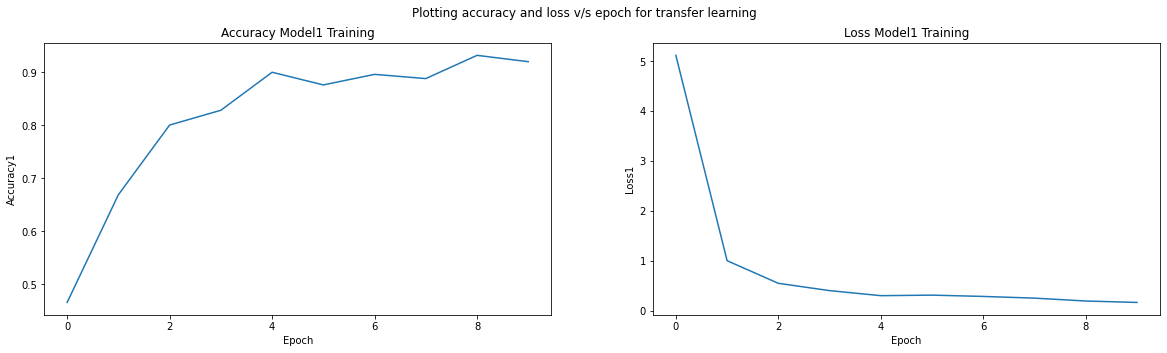

In [ ]:
# Plotting accuracy and loss v/s epoch
accuracy1 = history.history['accuracy']
loss1 = history.history['loss']

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Plotting accuracy and loss v/s epoch for transfer learning')

ax1.title.set_text('Accuracy Model1 Training')
sns.lineplot(data=accuracy1, ax=ax1)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy1')


ax2.title.set_text('Loss Model1 Training')
sns.lineplot(data=loss1, ax=ax2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss1')

In [ ]:
#Predict
import warnings
warnings.filterwarnings('ignore')
test = ImageDataGenerator(rescale = 1/255)                                       
test_dataset = test.flow_from_directory(test_path, target_size=(150, 150),batch_size=32,shuffle=False)
predictions = lmodel1.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_dataset.classes
class_labels = list(test_dataset.class_indices.keys()) 
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

Found 66 images belonging to 3 classes.
                 precision    recall  f1-score   support

          Covid       1.00      0.96      0.98        26
         Normal       0.93      0.65      0.76        20
Viral Pneumonia       0.74      1.00      0.85        20

       accuracy                           0.88        66
      macro avg       0.89      0.87      0.87        66
   weighted avg       0.90      0.88      0.88        66



Classification Report
Precision = TruePositives / (TruePositives + FalsePositives)
Recall = TruePositives / (TruePositives + FalseNegatives)
F1 = (2 * Precision * Recall) / (Precision + Recall)

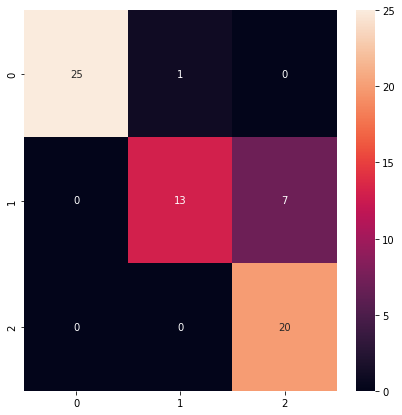

In [ ]:
#Confusion Matrix
#The easy way to interpret the confusion matrix for binary or multiclass classification is to see if we get maximum values in diagonal cells from left to right and minimum value in the rest of the cells.
conf_matrix3 = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix3, annot=True)

Training RestNet50 models on training dataset

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

base_model = ResNet50(weights='imagenet', include_top=False)
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(3, activation='softmax')(x)

# this is the model we will train
lmodel2 = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
lmodel2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
history = lmodel2.fit(train_dataset, 
                    epochs=10,
                    callbacks=[modelcheck,reduce_lr,early_stopping],
                    batch_size=32)


94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 1.4794 - accuracy: 0.3347WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 31s 3s/step - loss: 1.4794 - accuracy: 0.3347 - lr: 0.0010
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 1.0689 - accuracy: 0.4821WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 27s 3s/step - loss: 1.0689 - accuracy: 0.4821 - lr: 0.0010
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 1.0217 - accuracy: 0.5139WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 27s 3s/step - loss: 1.0217 - accuracy: 0.5139 - lr: 0.0010
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 0.9371 - accuracy: 0.5857WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 27s 3s/step - loss: 0.9371 - accuracy: 0.5857 - lr: 0.0010
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 0.8760 - accuracy: 0.5777WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 27s 3s/step - loss: 0.8760 - accuracy: 0.5777 - lr: 0.0010
Epoch 6/10
8/8 [==============================] - ETA: 0s - loss: 0.7958 - accuracy: 0.6454WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 27s 3s/step - loss: 0.7958 - accuracy: 0.6454 - lr: 0.0010
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 0.7266 - accuracy: 0.6693WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 27s 3s/step - loss: 0.7266 - accuracy: 0.6693 - lr: 0.0010
Epoch 8/10
8/8 [==============================] - ETA: 0s - loss: 0.6606 - accuracy: 0.7570WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 27s 3s/step - loss: 0.6606 - accuracy: 0.7570 - lr: 0.0010
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 0.6196 - accuracy: 0.7171WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 27s 3s/step - loss: 0.6196 - accuracy: 0.7171 - lr: 0.0010
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 0.5942 - accuracy: 0.7371WARNING:tensorflow:Can save best model only with val_accuracy available, skipping.


8/8 [==============================] - 27s 3s/step - loss: 0.5942 - accuracy: 0.7371 - lr: 0.0010


Text(0, 0.5, 'Loss')

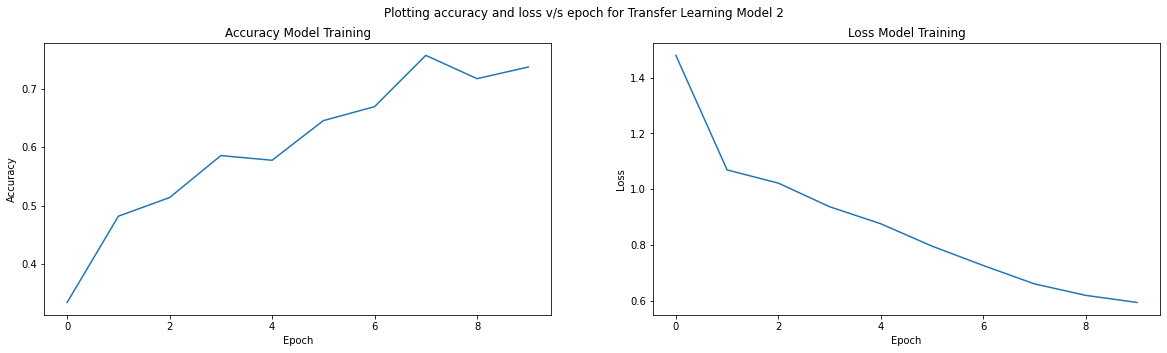

In [ ]:
# Plotting accuracy and loss v/s epoch
accuracy = history.history['accuracy']
loss = history.history['loss']

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Plotting accuracy and loss v/s epoch for Transfer Learning Model 2')

ax1.title.set_text('Accuracy Model Training')
sns.lineplot(data=accuracy, ax=ax1)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')


ax2.title.set_text('Loss Model Training')
sns.lineplot(data=loss, ax=ax2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')

In [ ]:
#Predict
import warnings
warnings.filterwarnings('ignore')
test = ImageDataGenerator(rescale = 1/255)                                       
test_dataset = test.flow_from_directory(test_path, target_size=(150, 150),batch_size=32,shuffle=False)
predictions = lmodel2.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_dataset.classes
class_labels = list(test_dataset.class_indices.keys()) 
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

Found 66 images belonging to 3 classes.
                 precision    recall  f1-score   support

          Covid       0.96      0.88      0.92        26
         Normal       0.67      0.90      0.77        20
Viral Pneumonia       0.67      0.50      0.57        20

       accuracy                           0.77        66
      macro avg       0.76      0.76      0.75        66
   weighted avg       0.78      0.77      0.77        66



Classification Report
Precision = TruePositives / (TruePositives + FalsePositives)
Recall = TruePositives / (TruePositives + FalseNegatives)
F1 = (2 * Precision * Recall) / (Precision + Recall)

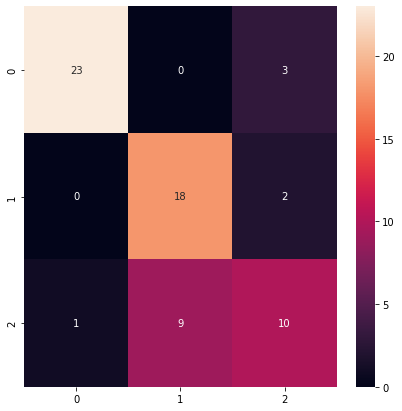

In [ ]:
#Confusion Matrix
#The easy way to interpret the confusion matrix for binary or multiclass classification is to see if we get maximum values in diagonal cells from left to right and minimum value in the rest of the cells.
conf_matrix3 = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (7,7))
sns.heatmap(conf_matrix3, annot=True)

In [ ]:
#Check accuracy in test
score0 = model0.evaluate(test_dataset, batch_size=16)
print('Model0 test score [loss, accuracy]:', score0)
score1 = model1.evaluate(test_dataset, batch_size=16)
print('Model1 test score [loss, accuracy]:', score1)
score2 = model2.evaluate(test_dataset, batch_size=16)
print('Model2 test score [loss, accuracy]:', score2)
score3 = model3.evaluate(test_dataset, batch_size=16)
print('Model3 test score [loss, accuracy]:', score3)
score4 = model_tuned.evaluate(test_dataset, batch_size=16)
print('Keras tuned model test score [loss, accuracy]:', score4)
score5 = lmodel1.evaluate(test_dataset, batch_size=16)
print('InceptionV3 test score [loss, accuracy]:', score5)
score6 = lmodel2.evaluate(test_dataset, batch_size=16)
print('RestNet50 model 2 test score [loss, accuracy]:', score6)

3/3 [==============================] - 3s 570ms/step - loss: 0.8184 - accuracy: 0.7727
Model0 test score [loss, accuracy]: [0.8184059858322144, 0.7727272510528564]
3/3 [==============================] - 5s 796ms/step - loss: 0.3237 - accuracy: 0.8485
Model1 test score [loss, accuracy]: [0.3237374424934387, 0.8484848737716675]
3/3 [==============================] - 7s 2s/step - loss: 1.4478 - accuracy: 0.6364
Model2 test score [loss, accuracy]: [1.4477940797805786, 0.6363636255264282]


3/3 [==============================] - 3s 573ms/step - loss: 0.8679 - accuracy: 0.7879
Model3 test score [loss, accuracy]: [0.8679496049880981, 0.7878788113594055]


3/3 [==============================] - 3s 590ms/step - loss: 0.2829 - accuracy: 0.9242
Keras tuned model test score [loss, accuracy]: [0.28292831778526306, 0.9242424368858337]
3/3 [==============================] - 5s 712ms/step - loss: 0.2909 - accuracy: 0.8788
InceptionV3 test score [loss, accuracy]: [0.2908875048160553, 0.8787878751754761]
3/3 [==============================] - 7s 1s/step - loss: 0.5047 - accuracy: 0.7727
RestNet50 model 2 test score [loss, accuracy]: [0.5046816468238831, 0.7727272510528564]


**Conclusion**
The prediction of COVID-19 using chest X-ray prevents the spread of the disease and detects the virus faster. In this study, we train, validate, and test different popular deep learning algorithms and we also used transfer learning.
Although this research is far from finished, the effectiveness of deep learning in such a wide range of real-world issues is astonishing. We've shown how to use a series of X-ray pictures to categorize positive and negative pneumonia, as well as Covid-19 data. The models were built from the ground up with all of the tools we acquired throughout the course. Using a bigger data set, this study might be extended in the future to detect and categorize X-ray pictures containing lung cancer, pneumonia, and Covid-19. Distinguishing X-ray pictures containing Covid-19 from those with pneumonia is critical, especially in current times when the Pandemic outbreak appears to be spreading, and our next step should be to address this issue.


**References**
Aryadipramarta. (2021, November 30). Covid19 image classification subs 1_1301184175. Kaggle. Retrieved December 26, 2021, from https://www.kaggle.com/aryadipramarta/covid19-image-classification-subs-1-1301184175/data 
Deshmukh, H. (2020, December 16). Medical X-ray ⚕️ image classification using Convolutional Neural Network. Medium. Retrieved December 26, 2021, from https://towardsdatascience.com/medical-x-ray-%EF%B8%8F-image-classification-using-convolutional-neural-network-9a6d33b1c2a 
Gandhi, A. (2021, May 20). Data augmentation: How to use deep learning when you have limited data. AI &amp; Machine Learning Blog. Retrieved December 26, 2021, from https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/ 
Is it pneumonia or COVID-19? Nova Health. (2021, November 30). Retrieved December 26, 2021, from https://www.novahealth.com/is-it-pneumonia-or-covid-19/ 
Is it pneumonia or COVID-19? Nova Health. (2021, November 30). Retrieved December 26, 2021, from https://www.novahealth.com/is-it-pneumonia-or-covid-19/ 
Rath, S. R., Rosebrock, A., Chumley, J., jeong, H., Alvarado, R., Hasan, M., Bonn, D., Blanc, E., Sulaimi, R., Amin, Mangalampalli, A., Jungbeck, R., Jason, Perumal, Hazan, H., Ratton, M., Lo, K., Admane, M., Goyal, L., … Muhriddin. (2021, April 17). Detecting covid-19 in X-ray images with Keras, tensorflow, and Deep Learning. PyImageSearch. Retrieved December 26, 2021, from https://www.pyimagesearch.com/2020/03/16/detecting-covid-19-in-x-ray-images-with-keras-tensorflow-and-deep-learning/
Roy, A. (2020, July 16). Introduction to gradient descent: Weight initiation and optimizers. Medium. Retrieved December 26, 2021, from https://towardsdatascience.com/introduction-to-gradient-descent-weight-initiation-and-optimizers-ee9ae212723f 
Sagar, A. (2019, November 26). Deep learning for detecting pneumonia from X-ray images. Medium. Retrieved December 26, 2021, from https://towardsdatascience.com/deep-learning-for-detecting-pneumonia-from-x-ray-images-fc9a3d9fdba8 
Team, K. (2021). Simple. flexible. powerful. Keras. Retrieved December 26, 2021, from https://keras.io/ 